# Artificial Neural Networks Regression Exercise

## Problem 1

Import the file `Materials_Dataset.csv` from the data folder as a pandas DataFrame called `data_1`. 

This dataset is used for predicting the creep life of metal alloys. It involves 13 features that include the material composition for each alloy (percentage of elements Ni, Al, Co, Cr, Mo, Re, Ru, Ta, W, Ti, Nb), and the testing conditions that include temperature T and the stress. The target column `Creep Life` contains value for the logarithm of the creep rupture life of the alloys.

The goal in this exercise is to predict the value of the Creep Life, given the material composition and testing conditions. 

In [ ]:

import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras 

from keras.layers import Input
from keras.layers import Dense
from keras.models import Model


In [3]:
data_1 = pd.read_csv('data/Materials_Dataset.csv')
data_1.head()

,Ni,Al,Co,Cr,Mo,Re,Ru,Ta,W,Ti,Nb,T,Stress,Creep Life
0,61.0,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1070,272,0.919078
1,61.0,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100,220,0.968483
2,61.0,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100,225,0.991226
3,61.0,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1070,280,1.089905
4,61.0,5.6,9.0,4.3,2.0,2.0,0.0,7.5,8.0,0.0,0.5,1100,210,1.155336


### Exploratory Data Analysis and Data Preparation 

Perform a brief Exploratory Data Analysis.

Assign the Creep Life column as a target variable, and use the remaining columns as data features.

Split the data into training and testing datasets, and scale them into [0, 1] range. Display the shapes of the variables.


In [ ]:
# perform a brief Exploratory Data Analysis
# data info()
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ni          152 non-null    float64
 1   Al          152 non-null    float64
 2   Co          152 non-null    float64
 3   Cr          152 non-null    float64
 4   Mo          152 non-null    float64
 5   Re          152 non-null    float64
 6   Ru          152 non-null    float64
 7   Ta          152 non-null    float64
 8   W           152 non-null    float64
 9   Ti          152 non-null    float64
 10  Nb          152 non-null    float64
 11  T           152 non-null    int64  
 12  Stress      152 non-null    int64  
 13  Creep Life  152 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 16.8 KB


In [5]:
# data describe()
data_1.describe()

,Ni,Al,Co,Cr,Mo,Re,Ru,Ta,W,Ti,Nb,T,Stress,Creep Life
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,59.467566,5.855921,9.096250,4.169671,1.706447,4.416579,1.323750,7.616184,6.048289,0.104737,0.125132,1069.559211,191.092105,2.213592
std,3.645787,0.204452,2.809983,1.177143,0.938209,1.208665,1.696514,0.846108,1.066967,0.275945,0.248708,58.368178,77.266406,0.409830
min,50.570000,5.000000,1.750000,2.000000,0.400000,1.770000,0.000000,3.900000,3.770000,0.000000,0.000000,950.000000,100.000000,0.919078
25%,57.200000,5.700000,7.000000,3.500000,1.000000,4.000000,0.000000,7.000000,5.400000,0.000000,0.000000,1010.000000,137.000000,2.025247
50%,59.900000,6.000000,9.000000,4.000000,1.500000,4.500000,0.000000,7.860000,6.000000,0.000000,0.000000,1100.000000,150.000000,2.232841
75%,61.650000,6.000000,12.000000,4.600000,2.100000,5.000000,2.850000,8.000000,6.525000,0.000000,0.000000,1100.000000,248.000000,2.442355
max,69.970000,6.200000,16.500000,7.000000,4.010000,6.800000,7.000000,9.000000,9.000000,1.040000,1.500000,1150.000000,400.000000,3.026370


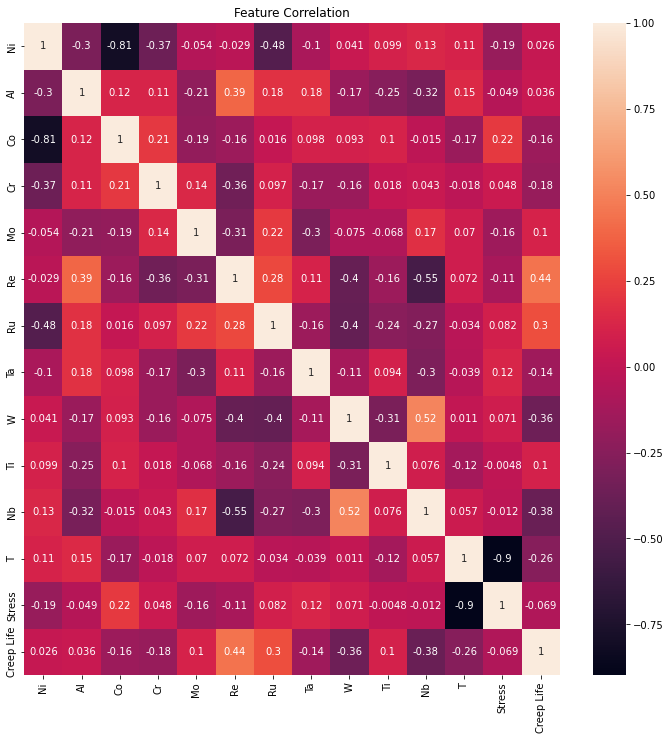

In [6]:
# data correlation
correlation = data_1.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlation, annot = True)
plt.title('Feature Correlation')
plt.show()

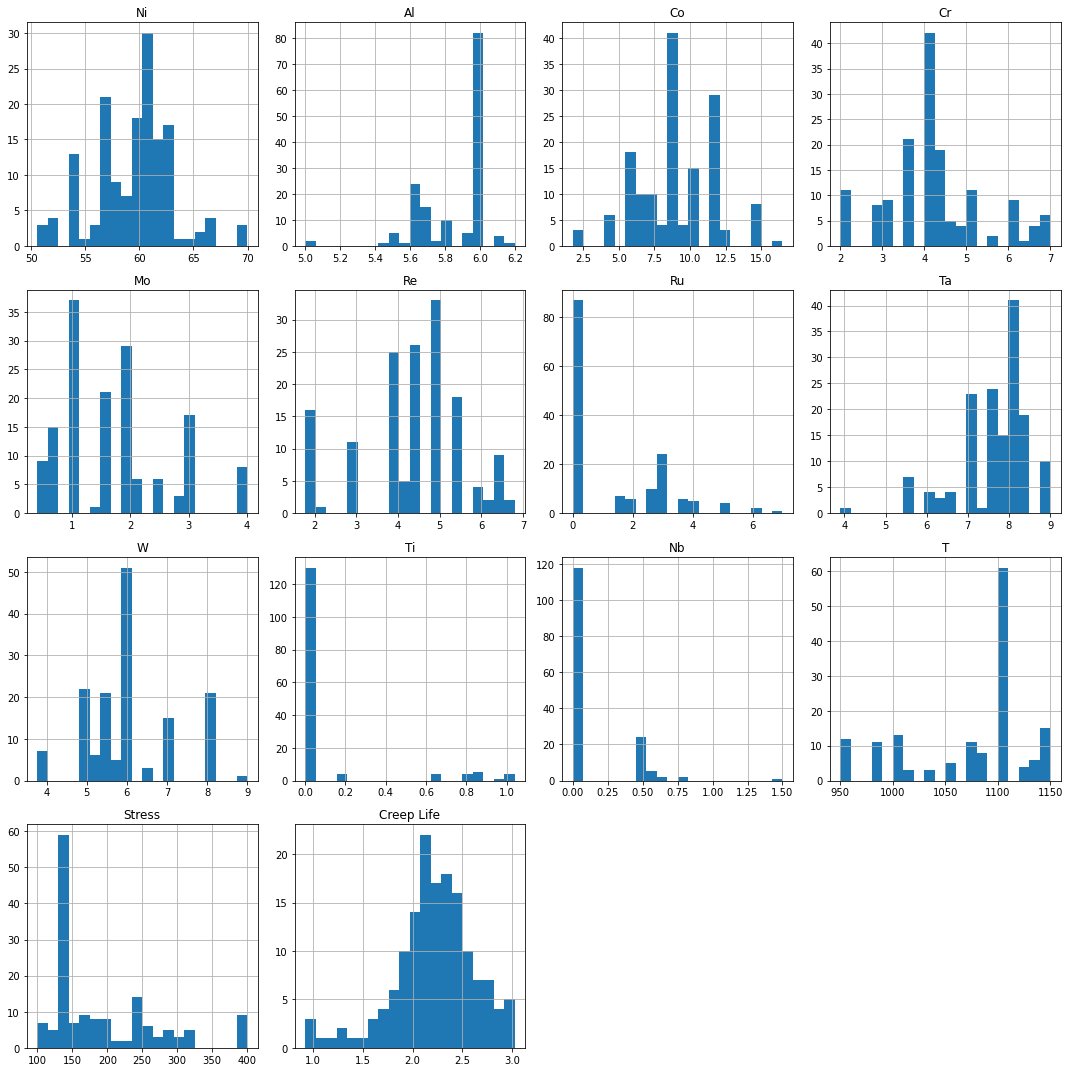

In [7]:
# feature distribution
data_1[['Ni', 'Al', 'Co', 'Cr', 'Mo', 'Re', 'Ru', 'Ta', 'W', 'Ti', 'Nb', 'T',
       'Stress', 'Creep Life']].hist(bins = 20,figsize = (15,15))
plt.tight_layout()

Perform a brief Exploratory Data Analysis. 

Assign the `Creep Life` column as a target variable, and use the remaining columns as data features.

Split the data into training and testing datasets, and scale them into [0, 1] range. Display the shapes of the variables. 


In [8]:
# assign the target variable to y and data features to X
y = data_1['Creep Life']
X = data_1.drop('Creep Life',axis = 1, inplace = True)

In [9]:
# split the train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [10]:
# scale the X_train and X_test to [0,1]
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

In [11]:
print("X_train_scaled shape: ",X_train_scaled.shape)
print("X_test_scaled shape: ",X_test_scaled.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train_scaled shape:  (114, 13)
X_test_scaled shape:  (38, 13)
y_train shape:  (114,)
y_test shape:  (38,)


### Train ANNs 

Create an ANN model with 3 hidden layers called `model_1`. Train the model for 100 epochs and evaluate it on the test dataset. Plot the learning curve. 


In [ ]:
# define the layers in the network
inputs = Input(shape = (13,))
dense1 = Dense(32, activation = 'relu')(inputs)
dense2 = Dense(32, activation = 'relu')(dense1)
dense3 = Dense(32, activation = 'relu')(dense2)
output = Dense(1)(dense3)


In [14]:
# define the model by proving the inputs and outputs
model_1 = Model(inputs, output)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_4 (Dense)             (None, 32)                448       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


In [18]:
# compile the model
model_1.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [19]:
# train the model
history = model_1.fit(X_train_scaled, y_train, epochs = 100, verbose = 0)

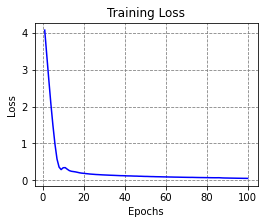

In [36]:
# plot the training loss

train_loss = history.history['loss']
epochsn = np.arange(1, len(train_loss)+1, 1)

plt.figure(figsize = (4,3))
plt.plot(epochsn, train_loss, 'b-')
plt.title('Training Loss')
plt.grid(color = 'grey',linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Calculate the MSE, MAE, and R2-score metrics on the test dataset.

In [ ]:
preditions = model_1.predict(X_test_scaled)

2/2 [==============================] - 0s 3ms/step


In [31]:
# calculate the MSE, MAE, and R2-score metrics on the test dataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MSE: {mean_squared_error(y_test, preditions):7.4f}')
print(f'MAE: {mean_absolute_error(y_test, preditions):7.4f}')
print("R2_score: {0:7.4f}".format(r2_score(y_test, preditions)))

MSE:  0.0546
MAE:  0.1928
R2_score:  0.6853


### Train Random Forest 

Train a Random Forest regression model for predicting the creep life of the materials. 

Calculate the MSE, MAE, and R2-score metrics on the test dataset.

Compare the performance of ANN and RF


In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train_scaled, y_train)

y_pred= rf_regressor.predict(X_test_scaled)

print('MSE: {0:7.4f}'.format(mean_squared_error(y_test, y_pred)))
print(f'MAE: {mean_absolute_error(y_test, y_pred):7.4f}')
print('R2_Score: %5.4f'%(r2_score(y_test, y_pred)))

MSE:  0.0329
MAE:  0.1473
R2_Score: 0.8104


Comparing the result between ANN and Random Forest model, we can see Random Forest model has a better performance over ANN model. Randoms Forest model has lower MSE and MAE, and has a higher R2_Score.

Plot the ground-truth and predicted values for the first 10 data points in the test dataset for the ANN and RF models in a single figure. 

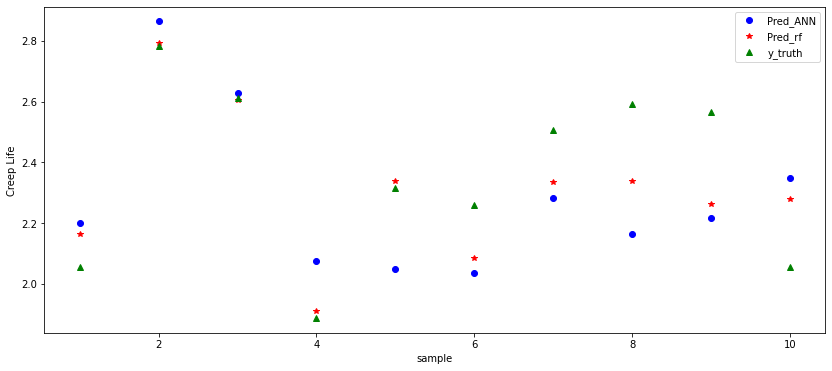

In [ ]:

plt.figure(figsize = (14,6))
pred_ANN = preditions[0:10]
pred_rf = y_pred[0:10]
y_truth = y_test[0:10]
x = np.arange(1,len(pred_ANN)+1, 1)


plt.plot(x, pred_ANN, 'bo',label = 'Pred_ANN')
plt.plot(x, pred_rf,'r*', label = 'Pred_rf')
plt.plot(x, y_truth, 'g^',label = 'y_truth')
plt.xlabel('sample')
plt.ylabel('Creep Life')
plt.legend()
plt.show()

## Part 2 

Import the file `insurance.csv` from the data folder as a pandas DataFrame called `data_2`. 

The dataset contains information for insurance charges based on age, sex, BMI, number of children, smoker, and region.

The goal is to predict insurance charges based on the given features. 

In [ ]:

data_2 = pd.read_csv('data/insurance.csv')
data_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis and Data Preparation 

Perform a brief Exploratory Data Analysis. Preprocess the data, split the data into training and testing datasets, and scale them into [0, 1] range. Display the shapes of the variables. 


In [ ]:

# data info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [102]:
data_2['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [103]:
data_2.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


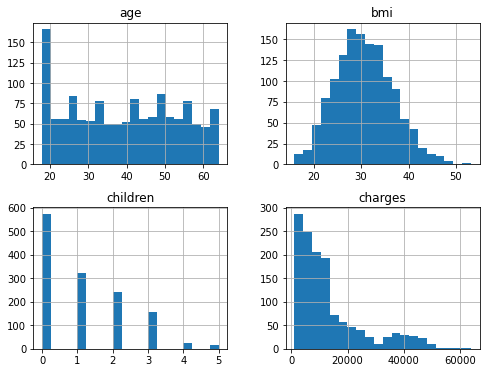

In [104]:
data_2[['age','bmi','children','charges']].hist(bins = 20, figsize = (8,6));

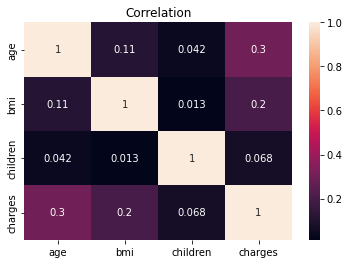

In [105]:
correlation = data_2.corr()
sns.heatmap(correlation,annot = True)
plt.title('Correlation')
plt.show()

In [106]:
#preprocess categorical data
from sklearn.preprocessing import OrdinalEncoder

cate_features = data_2[['sex','smoker','region',]]
encoderOrdinal = OrdinalEncoder()
cate_encoded = encoderOrdinal.fit_transform(cate_features)
data_2[['sex','smoker','region']] = pd.DataFrame(cate_encoded, columns = cate_features.columns, index = cate_features.index)
data_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [107]:
# assign target variable to y and the other columns to X; and split data set into train set and test set
y = data_2['charges']
X = data_2.drop('charges', axis = 1)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [108]:
# scale data into range[0,1]

minmaxScaler = MinMaxScaler()
X_train_scaled_2 = minmaxScaler.fit_transform(X_train_2)
X_test_scaled_2 = minmaxScaler.transform(X_test_2)

print('X_train_scaled_2 shape: ',X_train_scaled_2.shape)
print('X_test_scaled_2 shape: ',X_test_scaled_2.shape)
print('y_train_2 shape: ',y_train_2.shape)
print('y_test_2 shape: ',y_test_2.shape)

X_train_scaled_2 shape:  (1003, 6)
X_test_scaled_2 shape:  (335, 6)
y_train_2 shape:  (1003,)
y_test_2 shape:  (335,)


### Train ANNs 

Create an ANN model with 3 hidden layers called `model_2`. Train the model for 100 epochs and evaluate it on the test dataset. Plot the learning curve. 


In [ ]:

# define the layers in the network
inputs = Input(shape = (6,))
dense1 = Dense(32, activation = 'relu')(inputs)
dense2 = Dense(32, activation = 'relu')(dense1)
dense3 = Dense(32, activation = 'relu')(dense2)
output = Dense(1)(dense3)

In [110]:
# define the model by providing inputs and outputs
model_2 = Model(inputs, output)
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_12 (Dense)            (None, 32)                224       
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [111]:
#  compile the model
model_2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [112]:
# train the model
history2 = model_2.fit(X_train_scaled_2, y_train_2, epochs = 100, verbose = 0)

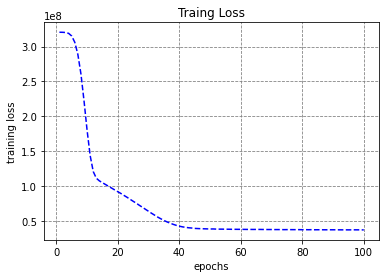

In [113]:
# plot learning curve
train_loss_2 = history2.history['loss']
epochsn = np.arange(1, len(train_loss_2)+1, 1)

#plt.figure(figsize = (4,3))
plt.plot(epochsn, train_loss_2, 'b--')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.title('Traing Loss')
plt.grid(color = 'grey',linestyle = '--')
plt.show()

In [115]:
pred_charges = model_2.predict(X_test_scaled_2)

11/11 [==============================] - 0s 1ms/step


### Evaluate the Model

Calculate MSE, MAE, and R-square metrics, and plot the ground-truth and predicted values for the first 10 data points in the test dataset.

In [ ]:

# calculate the MSE, MAE, R_square
print(f'MSE: {mean_squared_error(pred_charges, y_test_2):5.4f}')
print('MAE: {0:5.4f}'.format(mean_absolute_error(pred_charges, y_test_2)))
print('r2_score: %5.4f'%(r2_score(pred_charges, y_test_2)))

MSE: 32852076.3016
MAE: 4010.4355
r2_score: 0.6932


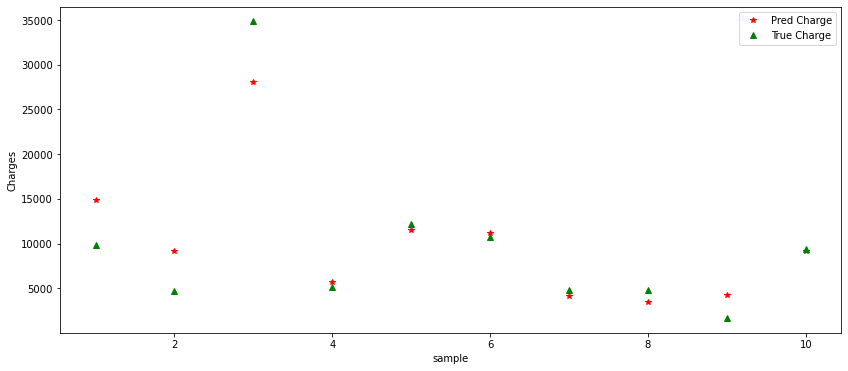

In [ ]:

plt.figure(figsize = (14,6))
pred_10 = pred_charges[0:10]
y_truth_2 = y_test_2[0:10]
x = np.arange(1,len(pred_10)+1, 1)

plt.plot(x, pred_10,'r*', label = 'Pred Charge')
plt.plot(x, y_truth_2, 'g^',label = 'True Charge')
plt.xlabel('sample')
plt.ylabel('Charges')
plt.legend()
plt.show()